In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv("final_data.csv")

In [4]:
df1.head()

,job,marital,contact,campaign,previous,poutcome,y,quarter,year,euriborQ,cons_confi_Q,cons_price_Q,emp_var_Q,age_level,first_time?,after_2008_depr
0,blue-collar,single,telephone,1,1,3.0,0,3,2008,4.12961,-41.970893,93.210879,-0.1,Mid Age Adult,1,1
1,services,married,telephone,1,1,3.0,1,3,2008,4.12961,-41.970893,93.210879,-0.1,Mid Age Adult,1,1
2,admin.,married,telephone,1,1,3.0,0,3,2008,4.12961,-41.970893,93.210879,-0.1,Mid Age Adult,1,1
3,admin.,married,telephone,1,1,3.0,1,3,2008,4.12961,-41.970893,93.210879,-0.1,Mid Age Adult,1,1
4,admin.,married,telephone,1,1,3.0,0,3,2008,4.12961,-41.970893,93.210879,-0.1,Mid Age Adult,1,1


# What is the most contact way that the bank has used?

In [5]:
age_grouped = df1.groupby("age_level")["contact"].value_counts()

In [6]:
age_grouped

age_level      contact  
Adult          cellular      4969
               telephone     2381
Mid Age Adult  cellular     16428
               telephone    10197
Senior Adult   cellular      4720
               telephone     2460
Teenager       cellular        27
               telephone        6
Name: contact, dtype: int64

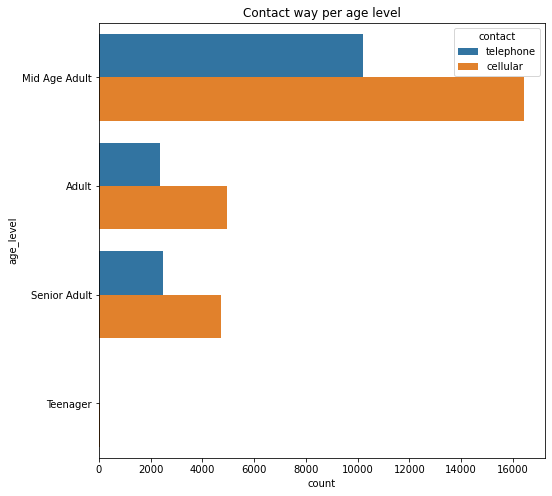

In [8]:
plt.figure(figsize = (8, 8))
plt.title("Contact way per age level")
sns.countplot(data = df1, y = "age_level", hue = "contact")
plt.show()

So from Here see that almos 50% of the contacts are made by a cellular phone, which is reasonable as all of the contacts are made after 2008.

# Year Vs Economic metrics:

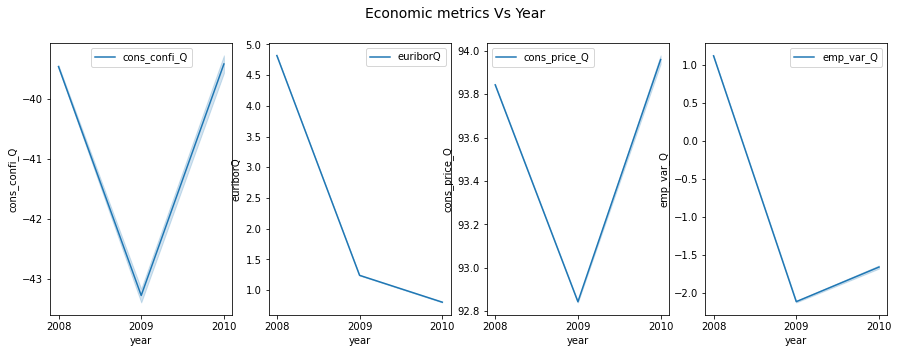

In [28]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(1,4, figsize = (15,5))
fig.suptitle("Economic metrics Vs Year", fontsize=14)
sns.lineplot(x = "year", y = "cons_confi_Q", data = df1, ax = ax1, label = "cons_confi_Q")
sns.lineplot(x = "year", y = "euriborQ", data = df1, ax = ax2, label = "euriborQ")
sns.lineplot(x = "year", y = "cons_price_Q", data = df1, ax = ax3, label = "cons_price_Q")
sns.lineplot(x = "year", y = "emp_var_Q", data = df1, ax = ax4, label = "emp_var_Q")
ax1.set_xticks([2008, 2009, 2010])
ax2.set_xticks([2008, 2009, 2010])
ax3.set_xticks([2008, 2009, 2010])
ax4.set_xticks([2008, 2009, 2010])
plt.show()

- From here we can see that for the cosumer confidence metric,it goes down in 2009 after the 2008 depression, and returns to it's value in 2010.
- EuriborQ indicates that the European banks tends to borrow less in 2010 as compared to 2008.
- Also consumer price metric shows a significant ups and downs according to the ecoomical depression in 2008.
- Employment variation rate indicates that in 2009 was the lowes employment rate.

# Does the job of the client affects the rate of deposited ones?

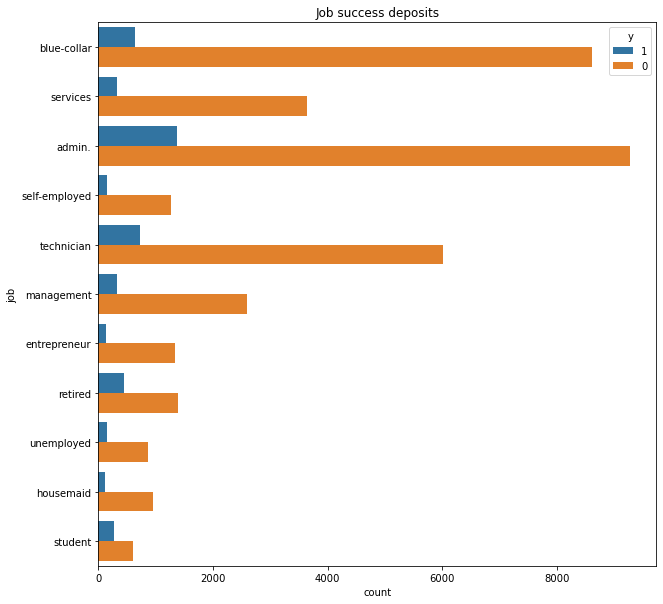

In [32]:
plt.figure(figsize = (10, 10))
plt.title("Job success deposits")
sns.countplot(data = df1, y = "job", hue = "y", hue_order = {1: "yes", 0: "no"})
plt.show()

- From here we can see that the students tends to deposit more, as we have a little number of students contacted, around half of them are deposited.
- Admins, management and technicians are also tends to deposit more than other jobs.

# Marital Status Vs Dopsite:

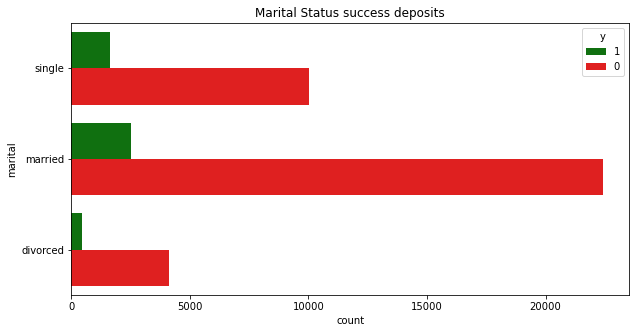

In [40]:
plt.figure(figsize = (10, 5))
plt.title("Marital Status success deposits")
sns.countplot(data = df1, y = "marital", hue = "y", hue_order = [1, 0], palette = {1: "green", 0: "red"})
plt.show()

So most of the argeted customers were Married, but it appears that the single ones has more opportunity to deposit.

# Economic Metrics relations:

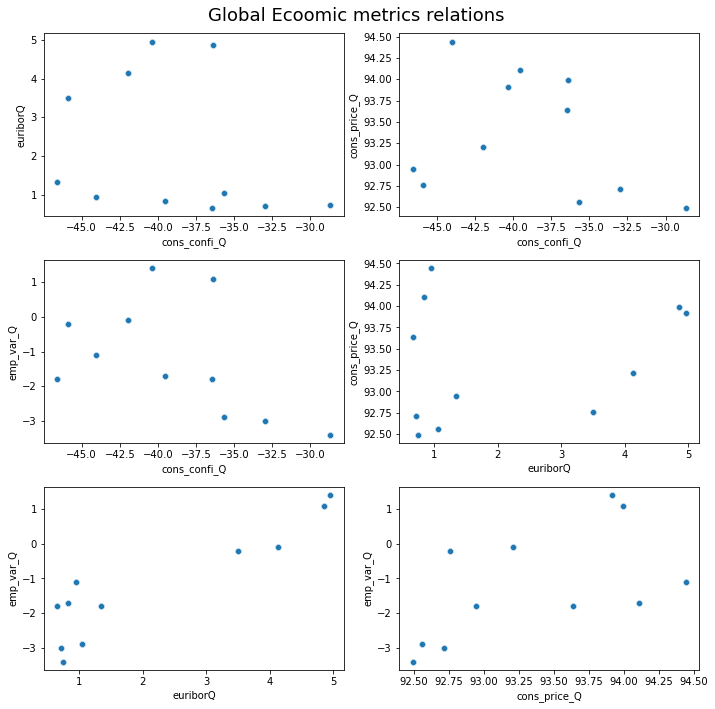

In [62]:
fig, (ax1,ax2,ax3) = plt.subplots(3,2, figsize = (10,10))
fig.suptitle("Global Ecoomic metrics relations", fontsize = 18)
sns.scatterplot(data = df1, x="cons_confi_Q",y = "euriborQ", ax = ax1[0])
sns.scatterplot(data = df1, x="cons_confi_Q",y = "cons_price_Q", ax = ax1[1])
sns.scatterplot(data = df1, x="cons_confi_Q",y = "emp_var_Q", ax = ax2[0])
sns.scatterplot(data = df1, x="euriborQ",y = "cons_price_Q", ax = ax2[1])
sns.scatterplot(data = df1, x="euriborQ",y = "emp_var_Q", ax = ax3[0])
sns.scatterplot(data = df1, x="cons_price_Q",y = "emp_var_Q", ax = ax3[1])
fig.tight_layout()
plt.show()

- Euribor Vs Consumer confidence index no obvious relation between their values.
- It appears that the consumer price index has a negative realtionship with the consumer confidence index.
- It appears that we need to make Euribor volumn to be binary as it has some values less than 2 and other more than three to be more reasonable
- The employment variation rate is has a positive correlation with the Euribor rate and consumer price index, which means that when the employment rate are up, the banks tends to borrow each other more, which represents and that's a postive sign.

## Editing Euribor column:

In [65]:
df1.groupby(["year", "quarter"])["euriborQ"].mean()

year  quarter
2008  1          4.857663
      2          4.954544
      3          4.129610
2009  4          3.493400
      5          1.339254
      6          1.051574
      7          0.740901
2010  8          0.712523
      9          0.659134
      10         0.830157
      11         0.949876
Name: euriborQ, dtype: float64

So It Appears that by the second quarter in 2009 - after the depression has it's effect- , the euribor rate has lower than 3 and before that it has a value more than 3, so we will deit this column to represent that change. 

In [66]:
def get_eruribor_stat(quarter):
    if quarter > 4:
        return -1
    else:
        return 1

In [67]:
df1["euribor_state"] = df1["quarter"].apply(get_eruribor_stat)

In [68]:
df1.head()

,job,marital,contact,campaign,previous,poutcome,y,quarter,year,euriborQ,cons_confi_Q,cons_price_Q,emp_var_Q,age_level,first_time?,after_2008_depr,euribor_state
0,blue-collar,single,telephone,1,1,3.0,0,3,2008,4.12961,-41.970893,93.210879,-0.1,Mid Age Adult,1,1,1
1,services,married,telephone,1,1,3.0,1,3,2008,4.12961,-41.970893,93.210879,-0.1,Mid Age Adult,1,1,1
2,admin.,married,telephone,1,1,3.0,0,3,2008,4.12961,-41.970893,93.210879,-0.1,Mid Age Adult,1,1,1
3,admin.,married,telephone,1,1,3.0,1,3,2008,4.12961,-41.970893,93.210879,-0.1,Mid Age Adult,1,1,1
4,admin.,married,telephone,1,1,3.0,0,3,2008,4.12961,-41.970893,93.210879,-0.1,Mid Age Adult,1,1,1


In [76]:
def get_2008_q(df):
    for index, row in df.iterrows():
        if row["year"] == 2008:
            df.loc[index, "quarter"] = df.loc[index, "quarter"]+1
    return df

In [72]:
df1 = get_2008_q(df1)

In [74]:
df1[df1["year"] == 2008]["quarter"].value_counts()

3    16234
2     7763
4     3683
Name: quarter, dtype: int64

In [77]:
def get_q(df):
    for index, row in df.iterrows():
        if row["year"] > 2008:
            df.loc[index, "quarter"] = (df.loc[index, "quarter"]%4) +1
    return df

In [78]:
df1 = get_q(df1)

In [79]:
df1.quarter.value_counts()

3    18670
2    16947
4     5389
1      182
Name: quarter, dtype: int64

Now all years are ready.

# Relation of Euribor with Consumer confidence accoring to years.

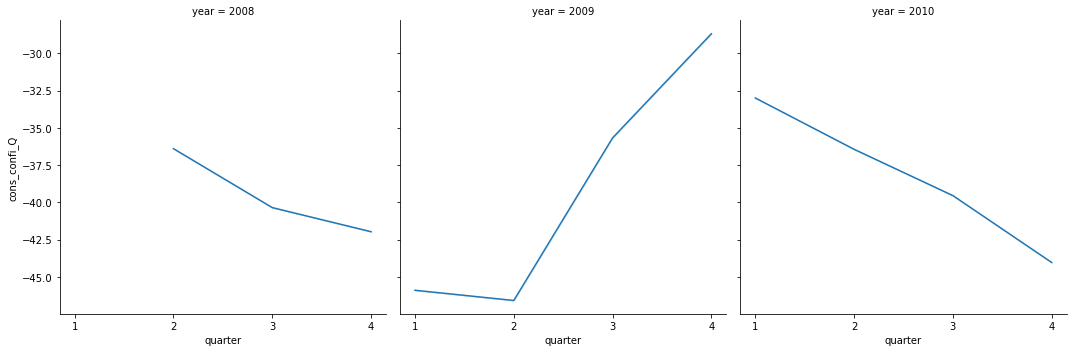

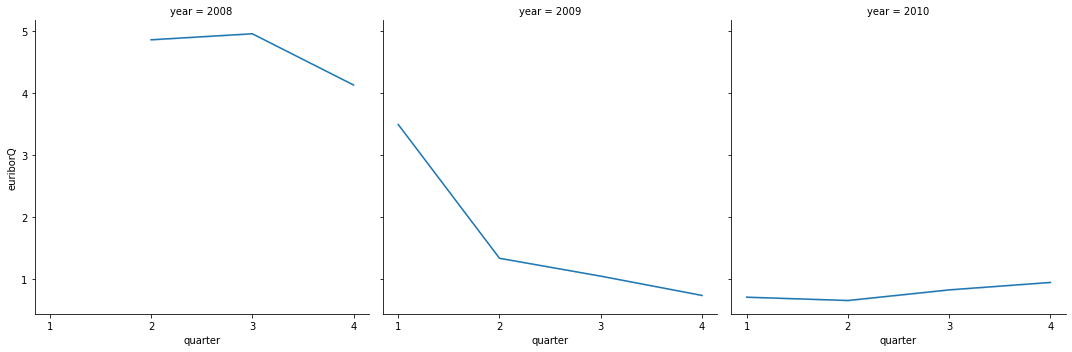

In [90]:
sns.relplot(data = df1, col = "year", x = "quarter", y = "cons_confi_Q", kind = "line")
plt.xticks([1,2,3,4])
sns.relplot(data = df1, col = "year", x = "quarter", y = "euriborQ", kind = "line")
plt.xticks([1,2,3,4])
plt.show()

- For Consumer confidence it appears that it has a negative slope till the 2nd quarter from 2009 when the euribor has been down tp less than 2, which the consumer has some more confidence, but at the begnning of 2010 it downs to it's original state.

In [92]:
df1.columns

Index(['job', 'marital', 'contact', 'campaign', 'previous', 'poutcome', 'y',
       'quarter', 'year', 'euriborQ', 'cons_confi_Q', 'cons_price_Q',
       'emp_var_Q', 'age_level', 'first_time?', 'after_2008_depr',
       'euribor_state'],
      dtype='object')

# Recommendations:

- Targeting More Students will be more benficial.
- Targeting Married and Single clients will be great step.
- Try More with Mangement, Admins and Technicians to deposite.